This notebook is to play with the fixedpoint `r` and `E` method.

## Flat Case Setup

Package boilerplate.

In [1]:
using Pkg 
pkg"activate .; instantiate; precompile"
using CSV, Plots, JSON, BenchmarkTools, Parameters, PerlaTonettiWaugh, DataFrames, Suppressor
gr(fmt = :png)

  Updating registry at `C:\Users\Chiyoung Ahn\.julia\registries\General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Precompiling project...
Precompiling PerlaTonettiWaugh


┌ Info: Recompiling stale cache file C:\Users\Chiyoung Ahn\.julia\compiled\v1.1\PerlaTonettiWaugh\Zi3ee.ji for PerlaTonettiWaugh [d2cacc76-b06b-11e8-362b-f18d03a16405]
└ @ Base loading.jl:1184


Plots.GRBackend()

Define our specific parameters.

In [2]:
d_T = parameter_defaults().d_T; 

parameters = parameter_defaults(d_0 = d_T + 1e-4) # as close to flat as we can get 
settings = settings_defaults(fixedpoint_iterations = 20, T = 1, tstops = 0:0.25:1);
# settings = settings_defaults(fixedpoint_iterations = 10);

In [3]:
solved.L_tilde

UndefVarError: UndefVarError: solved not defined

In [4]:
parameters = merge(parameters, (d = parameters.d_T, ))
stationary_numerical(parameters, settings).L_tilde

0.23654087175770097

In particular, we care about

In [5]:
@unpack fixedpoint_ftol, fixedpoint_m, fixedpoint_beta, fixedpoint_iterations, fixedpoint_x0 = settings;
@show fixedpoint_ftol, fixedpoint_m, fixedpoint_beta, fixedpoint_iterations, fixedpoint_x0

(fixedpoint_ftol, fixedpoint_m, fixedpoint_beta, fixedpoint_iterations, fixedpoint_x0) = (1.0e-8, 5, 1.0, 20, PerlaTonettiWaugh.default_fixedpoint_x0)


(1.0e-8, 5, 1.0, 20, PerlaTonettiWaugh.default_fixedpoint_x0)

Where the last one is:

In [6]:
default_fixedpoint_x0(parameters, settings)

8-element Array{Float64,1}:
 -0.75                
 -0.5                 
 -0.25                
  0.041499999999999995
  0.041499999999999995
  0.041499999999999995
  0.041499999999999995
  0.041499999999999995

## Flat Experiment

Let's run it. While it would be best to use Debugger or Rebugger or something, currently we're just using `@show` to spit out the norm difference `norm(new_r_tilde - (rho + delta * ones(Nts))`. To get something to plot, we can spit out the `new_r_tilde` itself, for example.

In [25]:
sol = solve_transition(parameters, settings);
solved = sol.results;

"one iteration passed." = "one iteration passed."
r_tilde = [0.0415, 0.0415, 0.0415, 0.0415, 0.0415]
norm(new_r_tilde - r_tilde) = 7.488125830787722e-5
"one iteration passed." = "one iteration passed."
r_tilde = [0.0414428, 0.0414598, 0.0414757, 0.0414919, 0.0414919]


┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37


norm(new_r_tilde - r_tilde) = 0.0038665812512324116
"one iteration passed." = "one iteration passed."
r_tilde = [0.0414812, 0.0414956, 0.0415121, 0.0415101, 0.0415101]


┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37
┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37


norm(new_r_tilde - r_tilde) = 0.0032755979513128812
"one iteration passed." = "one iteration passed."
r_tilde = [0.0414895, 0.0415061, 0.0415051, 0.041498, 0.041498]


┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37


norm(new_r_tilde - r_tilde) = 0.0022770999930253988
"one iteration passed." = "one iteration passed."
r_tilde = [0.0414983, 0.0415008, 0.0414984, 0.0415007, 0.0415007]


┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37


norm(new_r_tilde - r_tilde) = 0.0005196412864782745
"one iteration passed." = "one iteration passed."
r_tilde = [0.041499, 0.0414994, 0.0414997, 0.0414999, 0.0414999]


┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37


norm(new_r_tilde - r_tilde) = 2.4975756485334296e-7
"one iteration passed." = "one iteration passed."
r_tilde = [0.041499, 0.0414994, 0.0414997, 0.0414999, 0.0414999]
norm(new_r_tilde - r_tilde) = 3.1334372228267945e-9


┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37
┌ Warning: T < 50 can give erratic behavior.
└ @ PerlaTonettiWaugh C:\Users\Chiyoung Ahn\.julia\dev\PerlaTonettiWaugh\src\full\dynamic.jl:37


## Plots

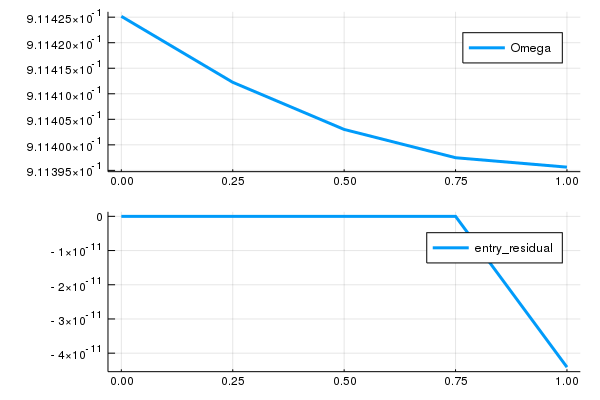

In [23]:
plot_Ω = plot(solved.t, solved.Ω, label = "Omega", lw = 3)
plot_residual = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

Here are the static equations

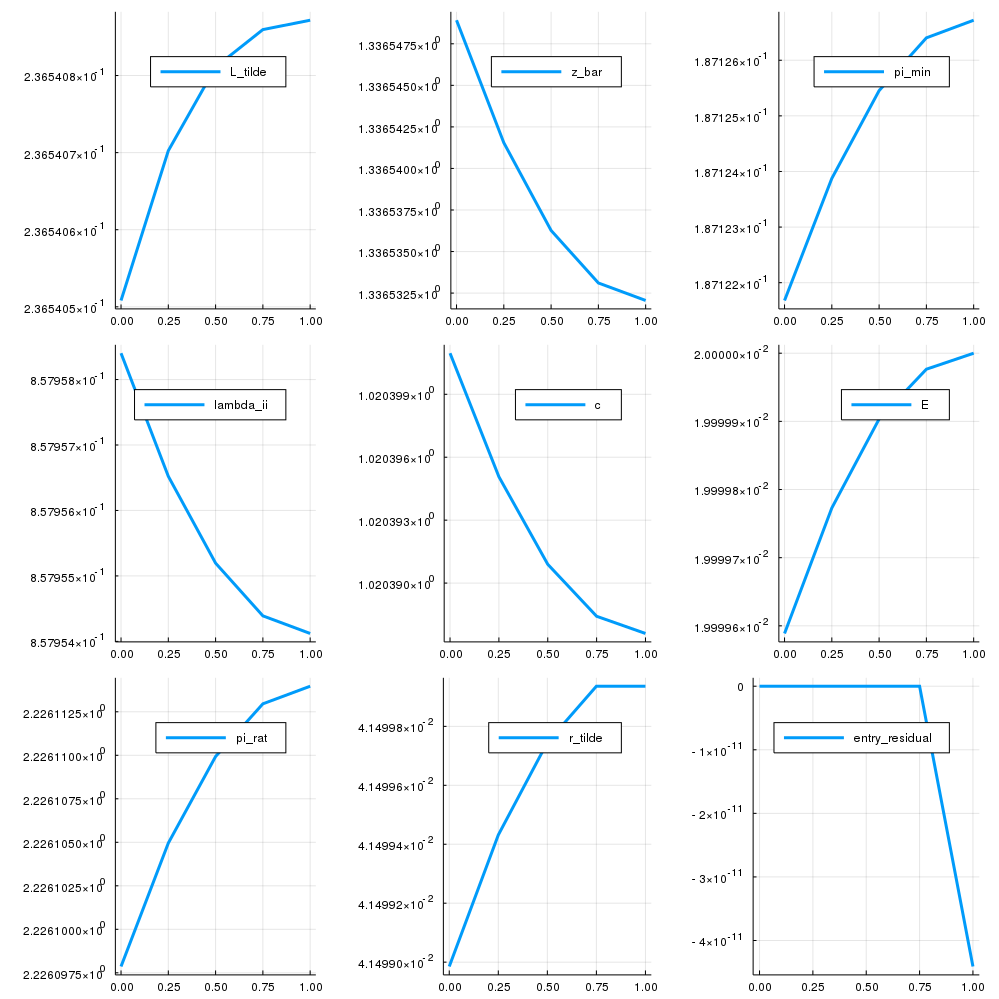

In [24]:
plot1 = plot(solved.t, solved.L_tilde, label = "L_tilde", lw = 3)
plot2 = plot(solved.t, solved.z_bar, label = "z_bar", lw = 3)
plot3 = plot(solved.t, solved.π_min, label = "pi_min", lw = 3)
plot4 = plot(solved.t, solved.λ_ii, label = "lambda_ii", lw = 3)
plot5 = plot(solved.t, solved.c, label = "c", lw = 3)
plot6 = plot(solved.t, solved.E, label = "E", lw = 3)
plot7 = plot(solved.t, solved.π_rat, label = "pi_rat", lw = 3)
plot8 = plot(solved.t, solved.r̃, label = "r_tilde", lw = 3)
plot9 = plot(solved.t, solved.entry_residual, label = "entry_residual", lw = 3)
plot(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, plot9, layout=(3,3), size = (1000, 1000))